In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import cv2
import glob
from numpy import array

from google.colab.patches import cv2_imshow

In [15]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [16]:
resize_ratio = 0.3

In [ ]:
# Dataset in oldugu path e gidip unzip yapiyoruz
# import os 
# os.chdir("/content/drive/My Drive/Colab Notebooks")

In [4]:
# ls

In [ ]:
# !unzip spectrograms.zip

In [ ]:
# Read RGB image
# img = cv2.imread('/content/drive/My Drive/Colab Notebooks/spectrograms/0/13230-0-0-1.png')
# cv2_imshow(img)

In [5]:
images = []
labels = []

from numpy.random import randint

class_folders = list(range(0,10))
data_path = "/content/drive/My Drive/Colab Notebooks/spectrograms/"

for class_folder in class_folders:
  class_directory = data_path + str(class_folder) + "/*.png"
  # print(class_directory)
  for file in glob.glob(class_directory):
    # print(file)
    img= cv2.imread(file)
    # RGB to Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Resize with respect to ratio
    resized = cv2.resize(gray, (int(gray.shape[1]*resize_ratio), int(gray.shape[0]*resize_ratio)))
    resized = array(resized)
    # Normalization
    normalized = resized/255
    img_lbl_list = [normalized, class_directory]
    images.append(normalized)
    labels.append(class_folder)

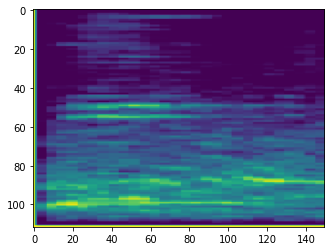

(112, 150)


(None, 1)

In [6]:
# Use the .imshow() function and show the plot
plt.imshow(images[1000])
plt.show()
# Print the shape of the sample image
print(images[1000].shape), labels[1000]

In [7]:
images = np.array(images)
labels = np.array(labels)
labels = labels.reshape(len(labels),1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(images, labels,
                                                    stratify=labels, 
                                                    test_size=0.10)

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                    stratify=y_train, 
                                                    test_size=0.10)

In [10]:
X_train.shape, y_train.shape

((7072, 112, 150), (7072, 1))

In [11]:
X_val.shape, y_val.shape

((786, 112, 150), (786, 1))

In [12]:
X_test.shape, y_test.shape

((874, 112, 150), (874, 1))

In [13]:
def save_files(nd_array, file_name):
  np.save(f"/content/drive/My Drive/Colab Notebooks/bootcamp_data/{file_name}.npy", nd_array)

In [14]:
save_files(X_train, 'X_train')
save_files(X_val, 'X_val')
save_files(X_test, 'X_test')
save_files(y_train, 'y_train')
save_files(y_val, 'y_val')
save_files(y_test, 'y_test')